# General data overview

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
DIALOGS_MERGED_DATA_PATH = "data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "data/merged_data/dialogs_users_all.csv"

In [4]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

## Messages data analysis

In [5]:
df.head(10)

,id,date,from_id,to_id,fwd_from,message,type,duration,reactions,dialog_id
0,6523.0,2022-03-25 14:42:12+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,#подкаст\n\n🇺🇦 Що робить українців такими силь...,photo,NaN,NaN,-1001044917656
1,6522.0,2022-03-25 14:37:47+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,#англійська\n\nМіжнародна онлайн-школа All Rig...,photo,NaN,NaN,-1001044917656
2,6521.0,2022-03-25 14:35:03+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,#вебінар\n\nЯк війна росії проти України зміню...,photo,NaN,NaN,-1001044917656
3,6520.0,2022-03-25 14:31:22+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,#англійська\n\n“Диверсант переплутав паляницю ...,photo,NaN,NaN,-1001044917656
4,6519.0,2022-03-24 10:17:41+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,Навчаємося та перемагаємо: «На Урок» оголошує ...,photo,NaN,NaN,-1001044917656
5,6518.0,2022-03-21 17:48:32+00:00,NaN,PeerChannel(channel_id=1044917656),"MessageFwdHeader(date=datetime.datetime(2022, ...","ЗНО, ДПА, єдиний вступний іспит та єдине фахов...",text,NaN,NaN,-1001044917656
6,6517.0,2022-03-21 07:15:54+00:00,NaN,PeerChannel(channel_id=1044917656),NaN,#робота\n\nІНФОРМАЦІЙНА ДОПОМОГА У ПРАЦЕВЛАШТУ...,photo,NaN,NaN,-1001044917656
7,6516.0,2022-03-20 19:03:50+00:00,NaN,PeerChannel(channel_id=1044917656),"MessageFwdHeader(date=datetime.datetime(2022, ...",NaN,photo,NaN,NaN,-1001044917656
8,6515.0,2022-03-20 19:03:50+00:00,NaN,PeerChannel(channel_id=1044917656),"MessageFwdHeader(date=datetime.datetime(2022, ...",NaN,photo,NaN,NaN,-1001044917656
9,6514.0,2022-03-20 19:03:50+00:00,NaN,PeerChannel(channel_id=1044917656),"MessageFwdHeader(date=datetime.datetime(2022, ...",NaN,photo,NaN,NaN,-1001044917656


In [6]:
df.shape

(1809422, 10)

In [7]:
min(df["date"]), max(df["date"])

('2016-04-14 16:45:37+00:00', '2022-11-28 22:55:12+00:00')

In [8]:
df.groupby(["type"])["type"].count()

type
photo       104050
sticker      42246
text       1622803
video        22017
voice        18306
Name: type, dtype: int64

In [9]:
df.groupby(["type"])["duration"].sum()

type
photo            0.0
sticker          0.0
text             0.0
video      1017345.0
voice       397602.0
Name: duration, dtype: float64

## Superficial analysis

Define your telegram ID (https://www.alphr.com/telegram-find-user-id/).

In [10]:
MY_ID = 387767007

The longest audio message you've ever sent; what's its duration? Make its screenshot (insert your screenshots in this notebook).

In [11]:
df[(df['type'] == "voice") & (df['from_id'] == f"PeerUser(user_id={MY_ID})")].sort_values('duration',
                                                                                          ascending=False).head(1)

,id,date,from_id,to_id,fwd_from,message,type,duration,reactions,dialog_id
1693352,181194.0,2022-06-04 09:21:01+00:00,PeerUser(user_id=387767007),596564145,NaN,NaN,voice,616.0,{},596564145


In [23]:
from datetime import datetime, date

to_date = lambda s: datetime.strptime(s, '%Y-%m-%d %H:%M:%S+00:00').date()
df['date'] = df['date'].apply(to_date)

Numbers of send and received(s&r) messages.

Here's some functions for getting messages with a specific person:

In [12]:
def get_messages_by_chat_id(id: int) -> pd.DataFrame:
    return df[df['dialog_id'] == id]


def get_messages_by_chat_name(name: str) -> pd.DataFrame:
    dialog_id = df_meta[df_meta['name'] == name]['dialog_id'].values[0]
    return get_messages_by_chat_id(dialog_id)

A helper function to make big numbers look less ugly:

In [13]:
def prettify_number(num) -> str:
    return f"{num:_}"

Now, sent/received messages:

In [14]:
# generic function to get sent messages from a dataframe of messages
def get_sent_messages(messages: pd.DataFrame) -> pd.DataFrame:
    return messages[messages['from_id'] == f"PeerUser(user_id={MY_ID})"]


# generic function to get received messages from a dataframe of messages
def get_received_messages(messages: pd.DataFrame) -> pd.DataFrame:
    return messages[messages['from_id'] != f"PeerUser(user_id={MY_ID})"]

In [15]:
# format sent/received messages amount
def format_sent_received_messages_amount(messages: pd.DataFrame) -> str:
    sent_amount = prettify_number(get_sent_messages(messages).shape[0])
    received_amount = prettify_number(get_received_messages(messages).shape[0])

    return f"sent: {sent_amount}, received: {received_amount}"

In [16]:
# helper lambdas to split messages by dialog type

is_private = lambda x: "Peer" not in str(x['to_id'])
is_channel = lambda x: str(x['from_id']) == 'nan' and "Peer" in str(x['to_id'])
is_group = lambda x: not is_private(x) and not is_channel(x)

In [31]:
private_messages = df[df.apply(is_private, axis=1)]
group_messages = df[df.apply(is_group, axis=1)]
channel_messages = df[df.apply(is_channel, axis=1)]

In [18]:
assert df.size == private_messages.size + group_messages.size + channel_messages.size

In [19]:
# all chats
format_sent_received_messages_amount(df)

'sent: 205_987, received: 1_603_435'

In [20]:
# channels
format_sent_received_messages_amount(channel_messages)

'sent: 0, received: 10_101'

In [21]:
# groups
format_sent_received_messages_amount(group_messages)

'sent: 48_228, received: 1_469_885'

In [22]:
# private
format_sent_received_messages_amount(private_messages)

'sent: 157_759, received: 123_449'

Number of send and received(s&r) messages per day (x-axis - is date(from min(date) till max(date)), y-axis number of messages). There should be two lines: blue for received red for send.

Here's some generic functions for getting sent/received messages per day:

In [24]:
def messages_in_range(messages: pd.DataFrame, min_date: date, max_date: date) -> pd.DataFrame:
    return messages[(messages['date'] >= min_date) & (messages['date'] <= max_date)]


def messages_per_day(messages: pd.DataFrame) -> pd.Series:
    return messages.groupby(['date']).size()


def sent_received_messages_per_day(messages: pd.DataFrame, min_date: date = None, max_date: date = None) -> pd.Series:
    if min_date is not None and max_date is not None:
        messages = messages_in_range(messages, min_date, max_date)

    sent_received = pd.DataFrame()
    sent_received['received'] = messages_per_day(get_received_messages(messages))
    sent_received['sent'] = messages_per_day(get_sent_messages(messages))

    return sent_received

And, finally, the plots themselves:

In [32]:
def plot_sent_received_messages_per_day(messages: pd.DataFrame, title: str = "", min_date: date = None,
                                        max_date: date = None):
    sent_received_messages_per_day(messages, min_date, max_date).fillna(0, axis=1).plot(title=title, figsize=(20, 10))

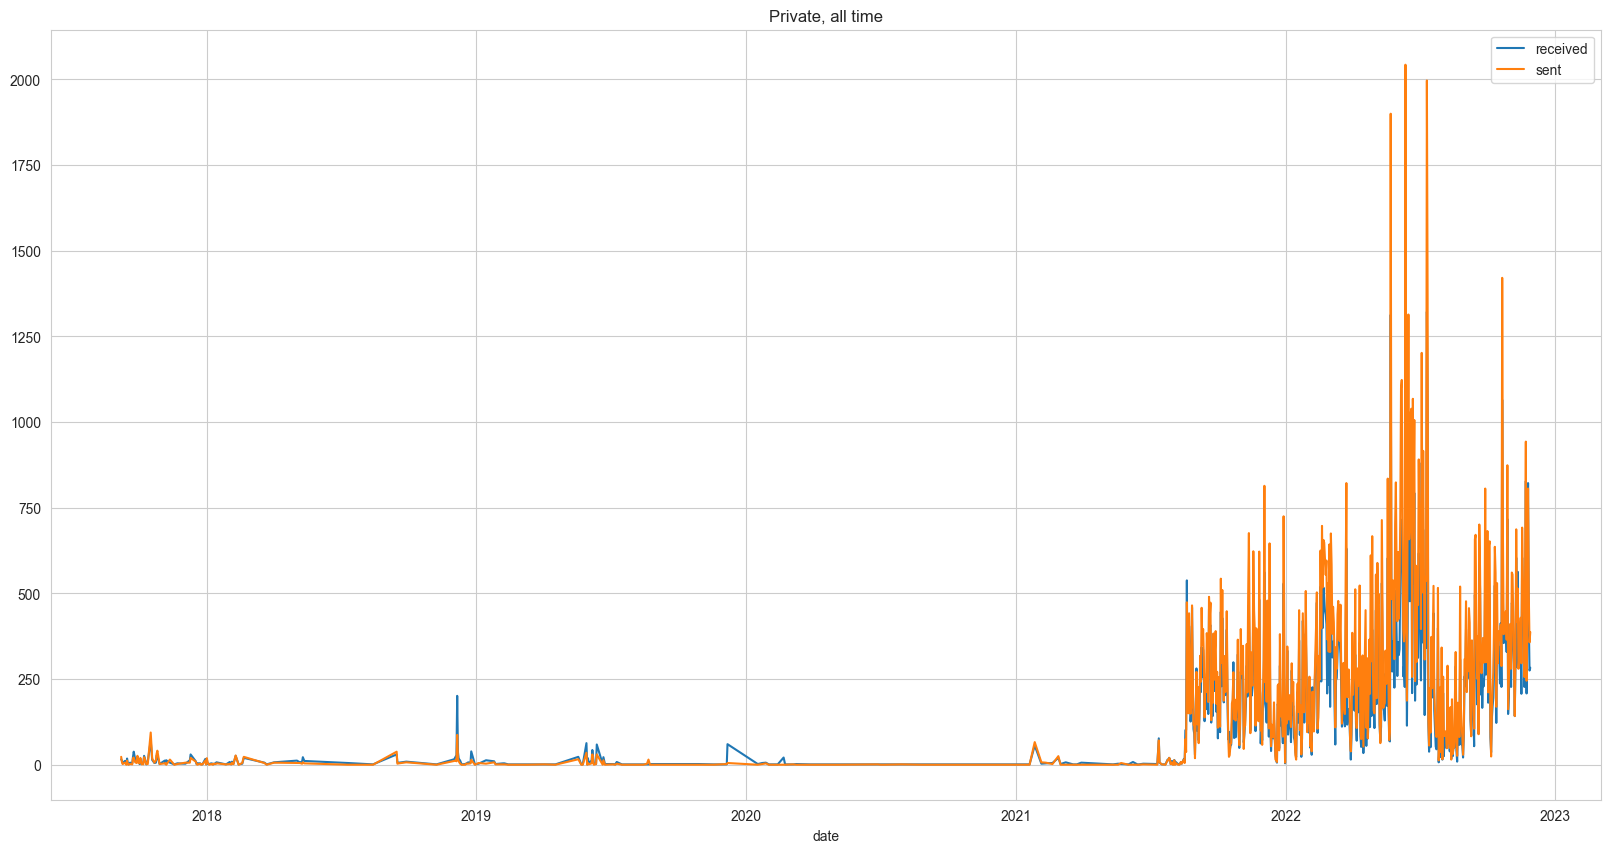

In [33]:
plot_sent_received_messages_per_day(private_messages, "Private, all time")

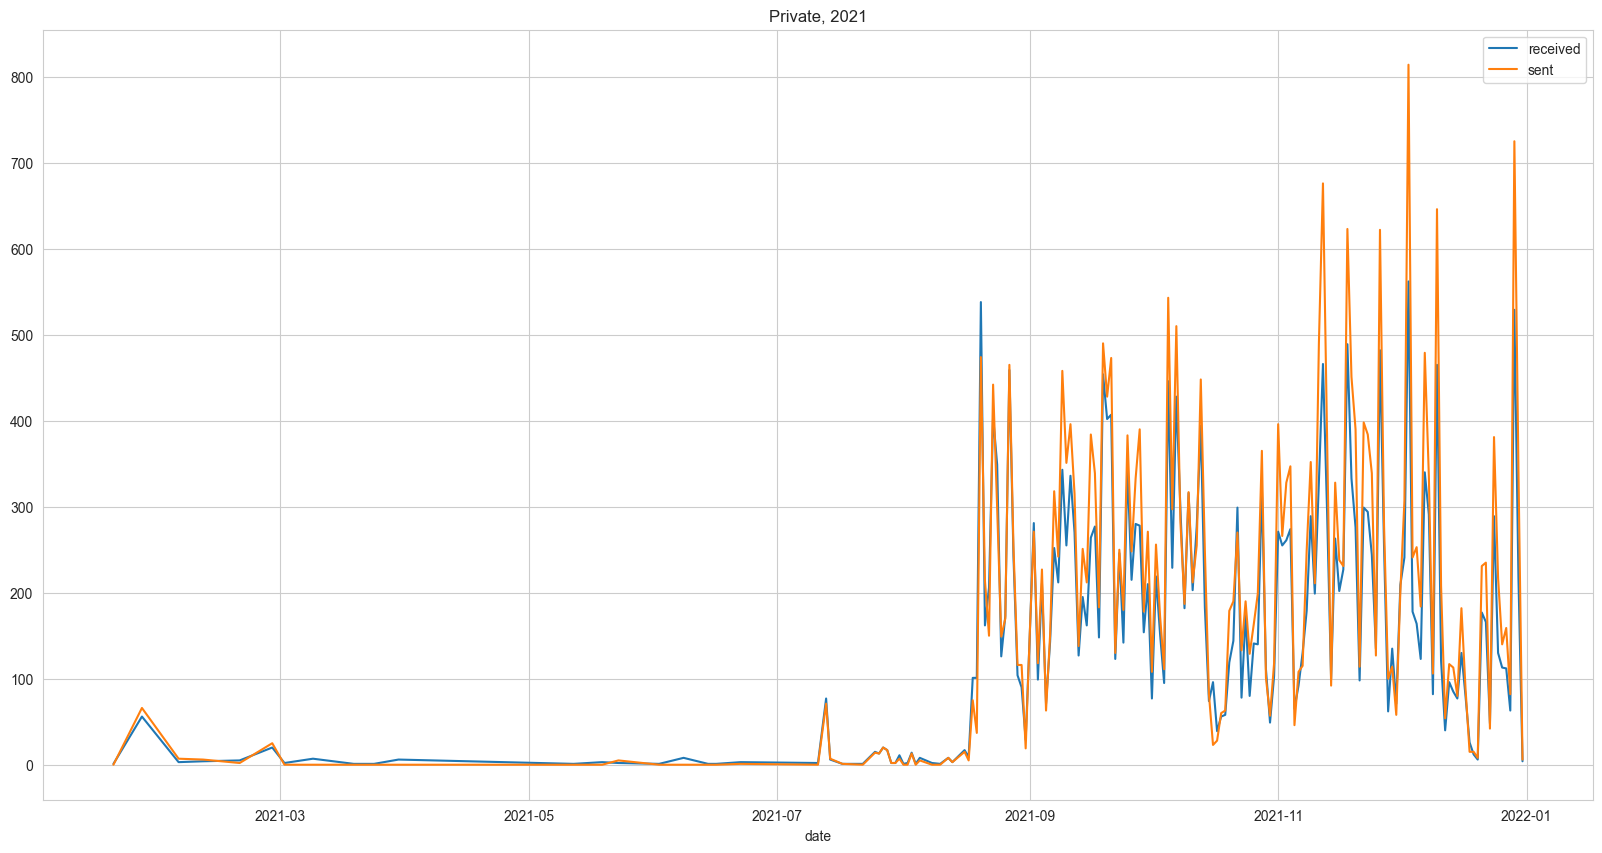

In [34]:
plot_sent_received_messages_per_day(private_messages, "Private, 2021", date(2021, 1, 1), date(2021, 12, 31))

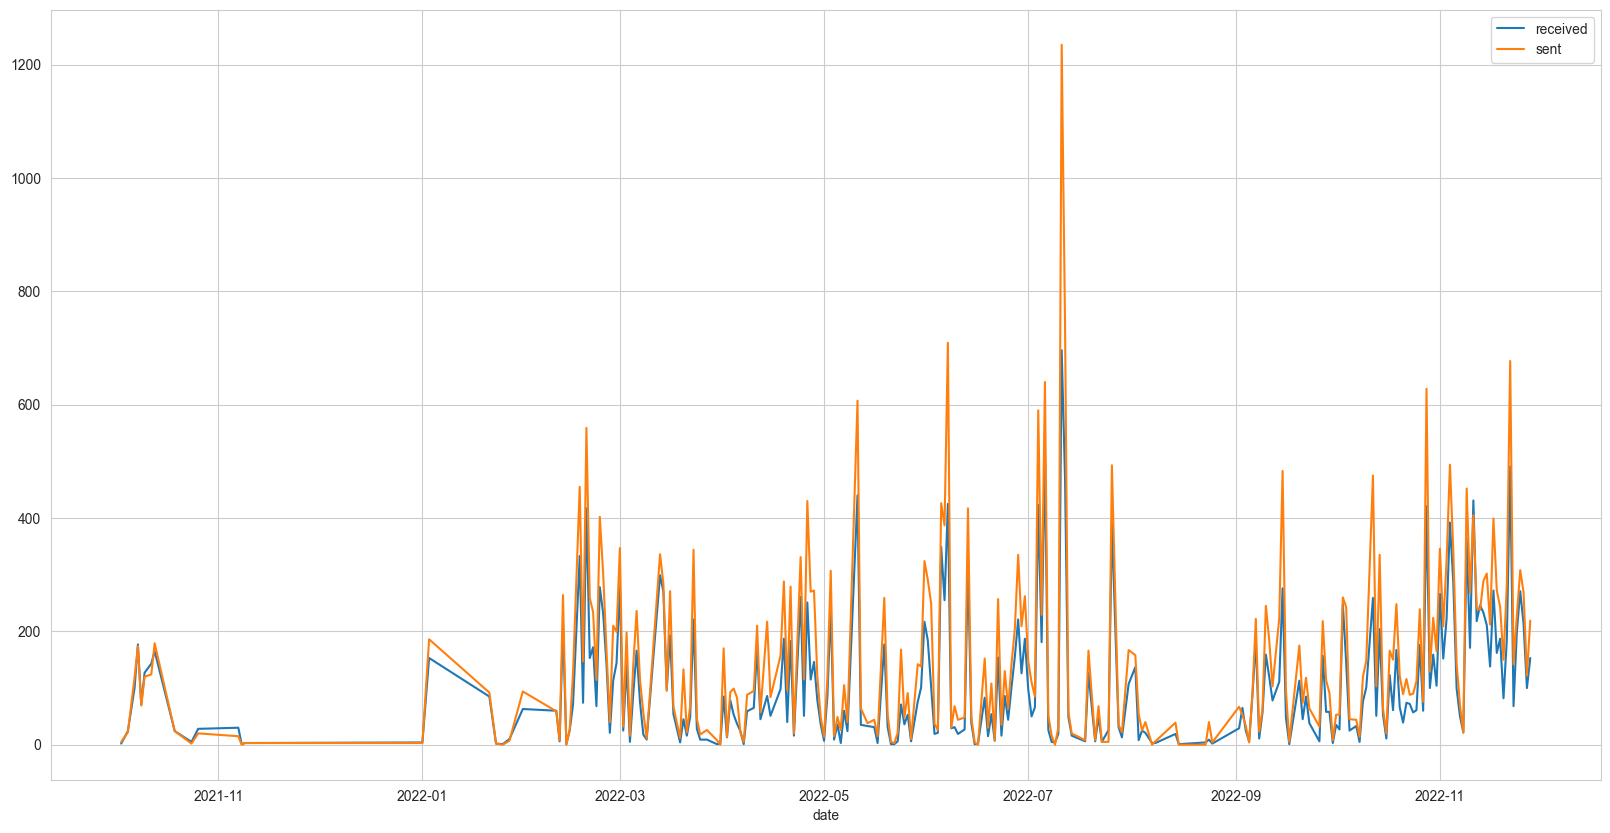

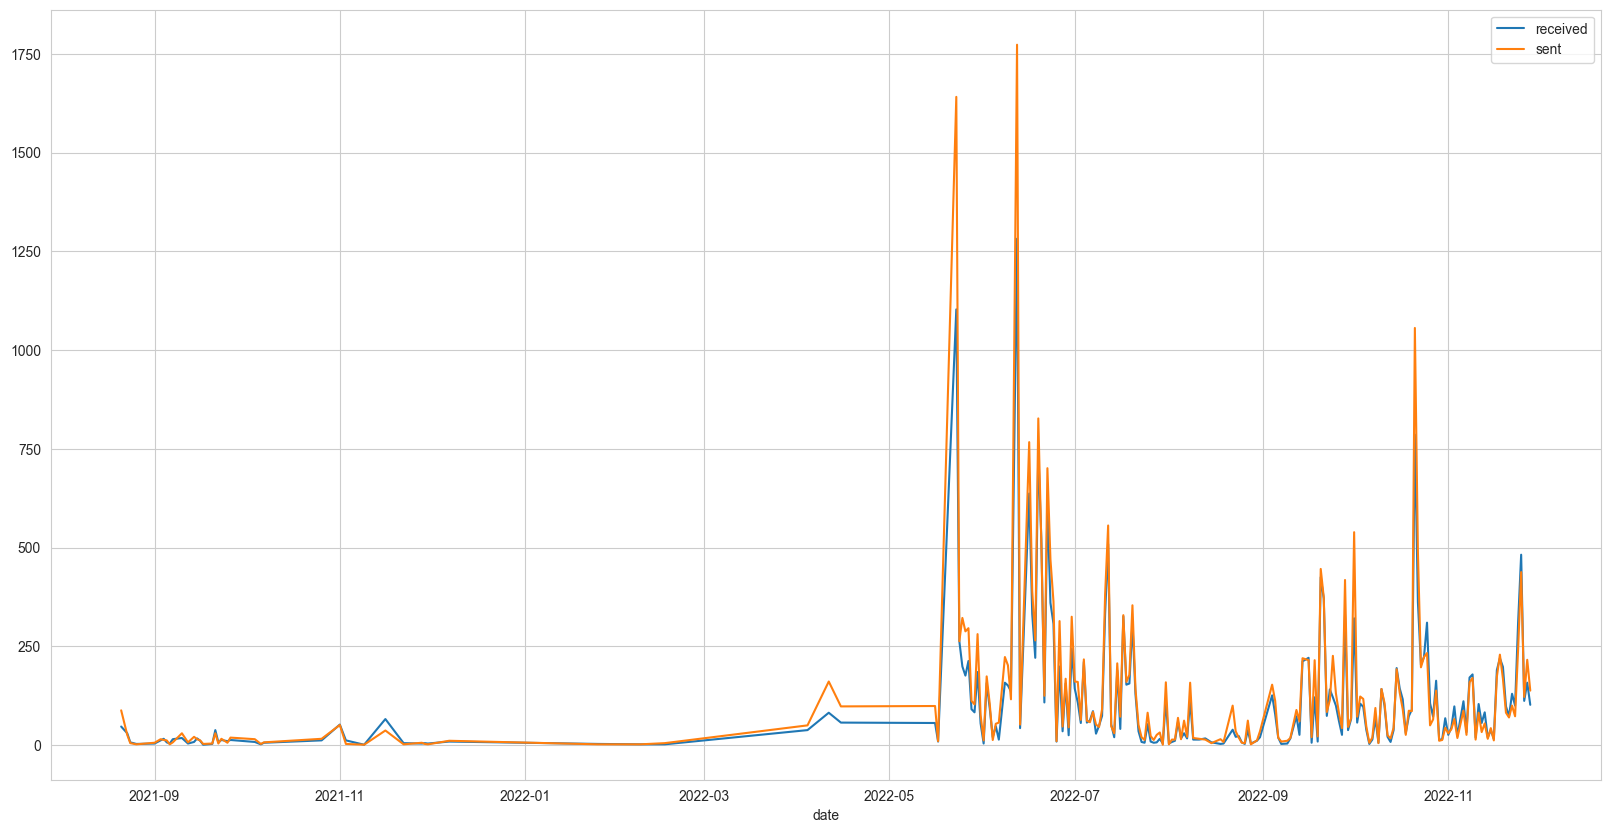

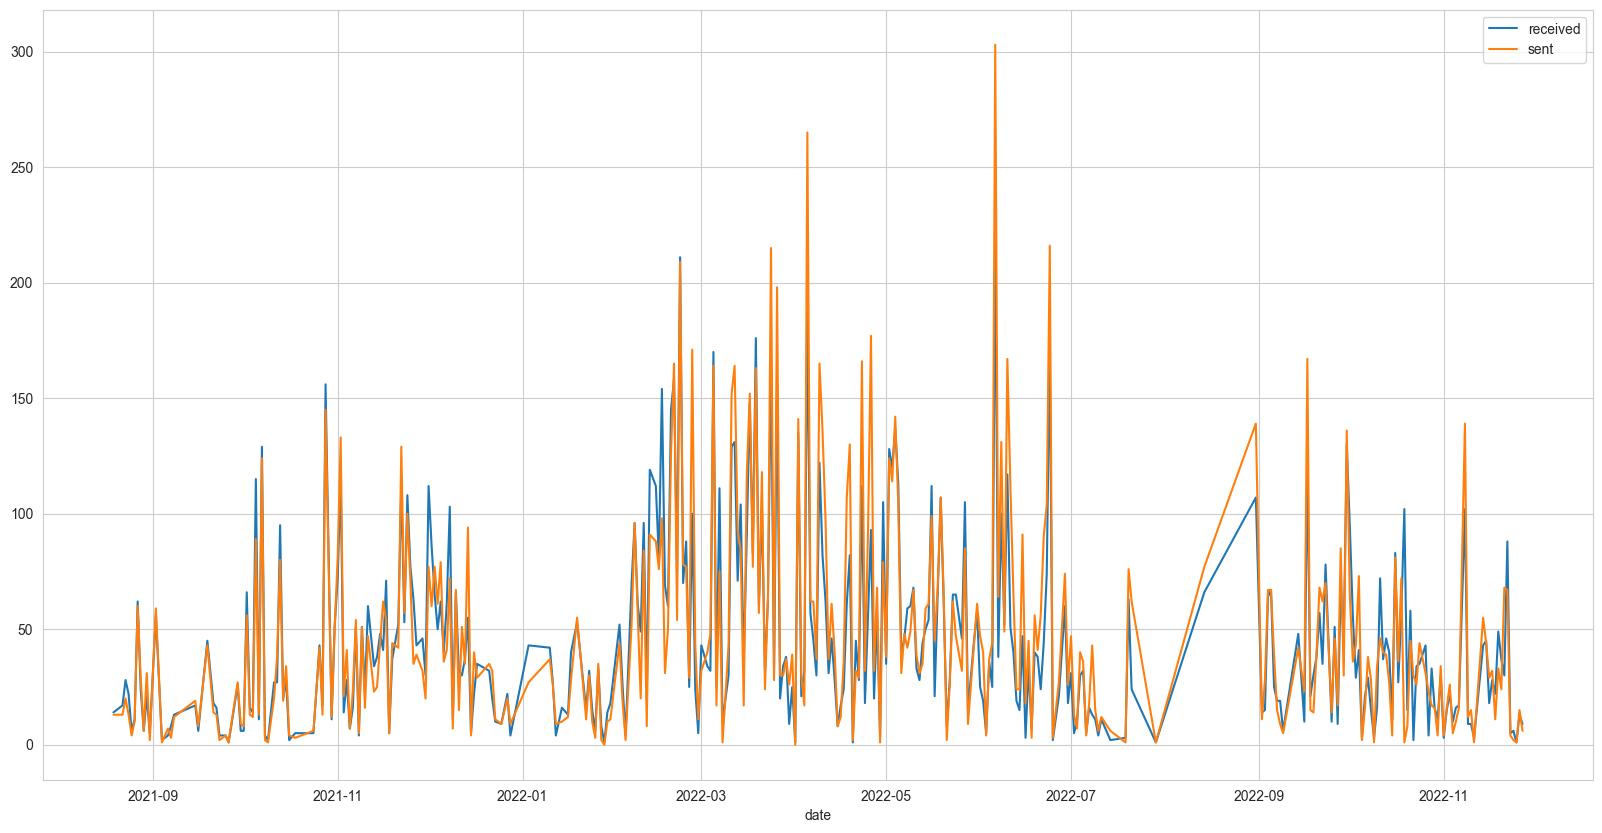

In [35]:
plot_sent_received_messages_per_day(get_messages_by_chat_id(561326466))
plot_sent_received_messages_per_day(get_messages_by_chat_id(621860286))
plot_sent_received_messages_per_day(get_messages_by_chat_id(793545135))

6. Draw a few diagrams to show distributions between post types in the time, a diagram showing the total amount of messages of each type.

In [37]:
def plot_distribution_of_message_types_by_day(messages: pd.DataFrame, title: str = "",
                                              min_date: date = None, max_date: date = None,
                                              exclude_text: bool = False):
    if exclude_text:
        messages = messages[messages['type'] != 'text']
    if min_date is not None and max_date is not None:
        messages = messages_in_range(messages, min_date, max_date)

    messages.groupby(['date', 'type']).size().unstack(level=1).fillna(0, axis=1).plot(title=title, figsize=(20, 5))

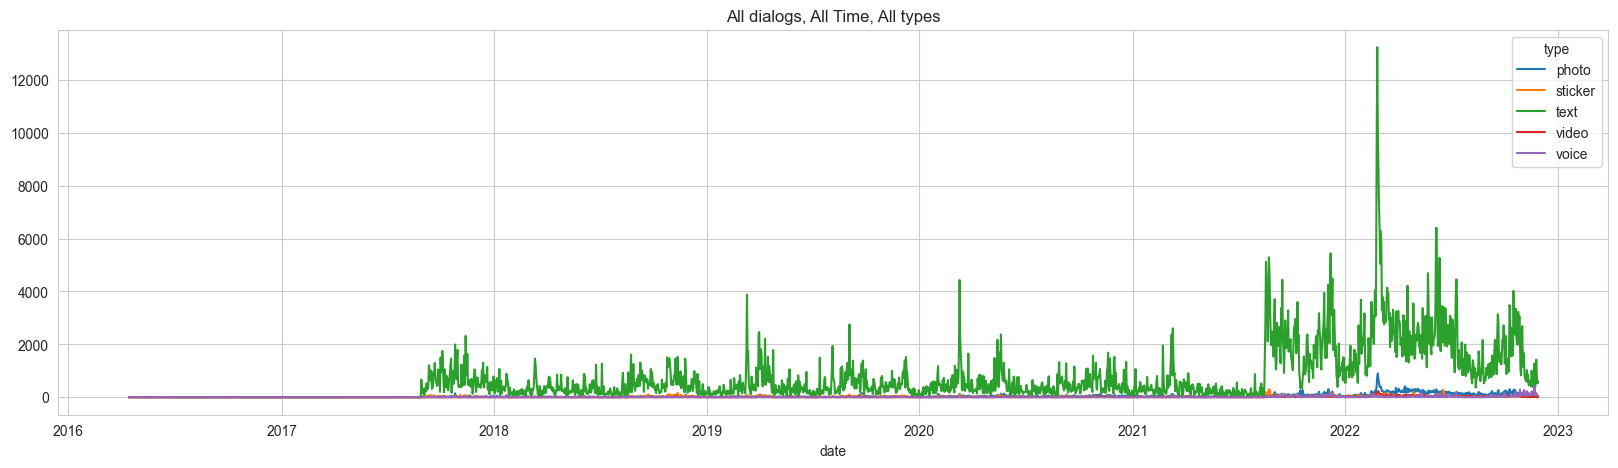

In [38]:
plot_distribution_of_message_types_by_day(df, "All dialogs, All Time, All types")

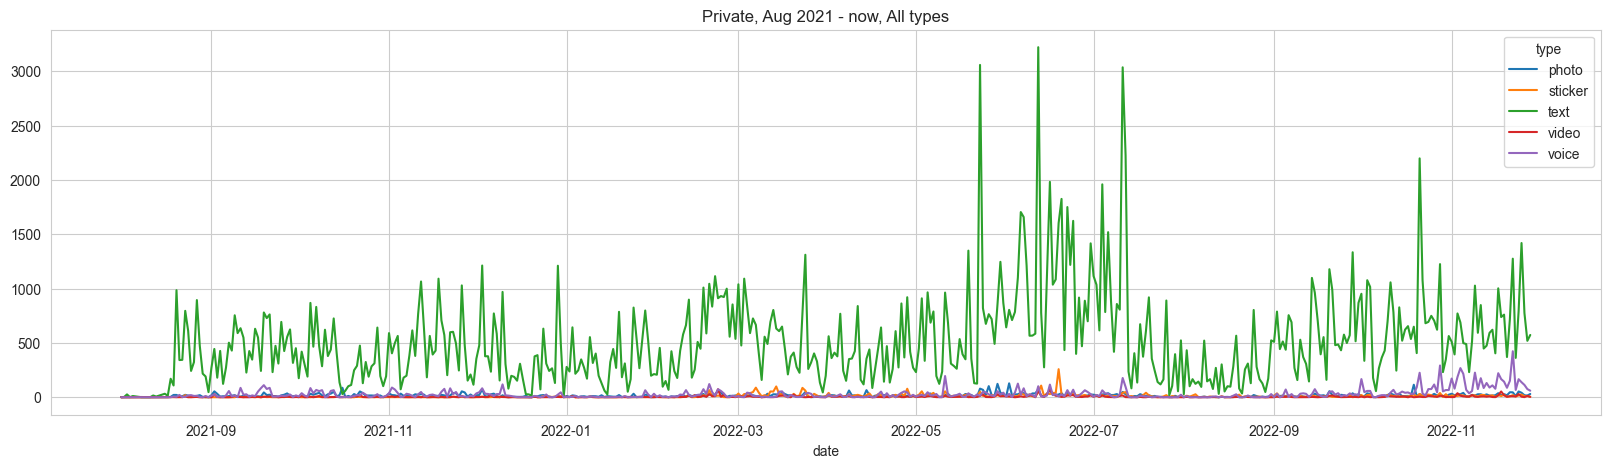

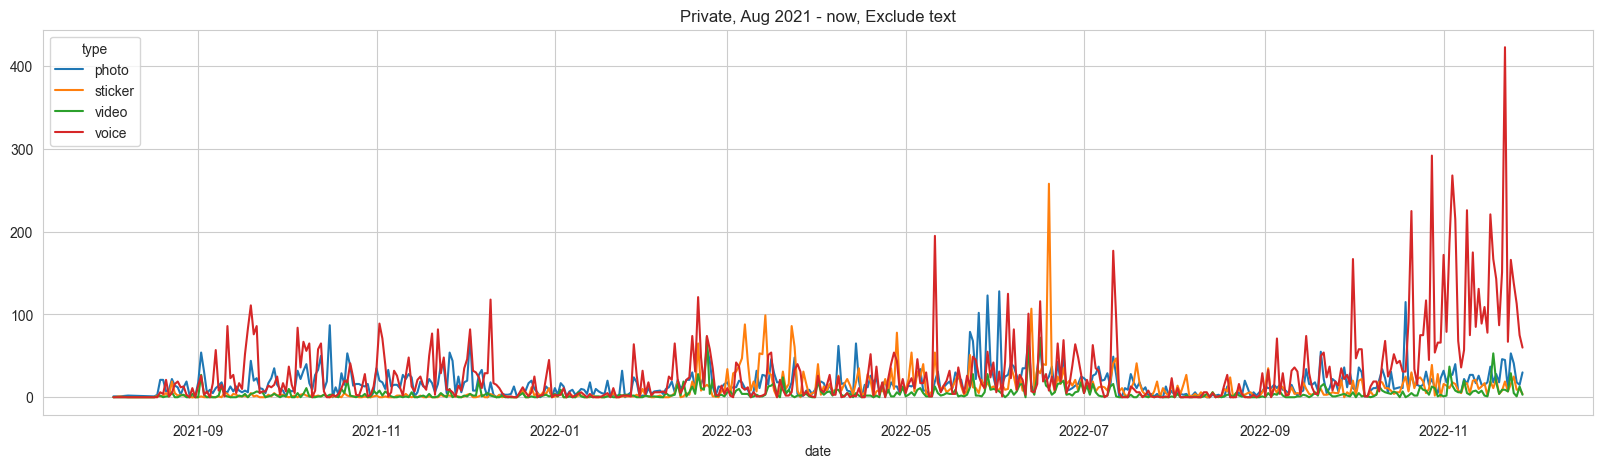

In [39]:
plot_distribution_of_message_types_by_day(private_messages, "Private, Aug 2021 - now, All types",
                                          date(2021, 8, 1), datetime.today().date())
plot_distribution_of_message_types_by_day(private_messages, "Private, Aug 2021 - now, Exclude text",
                                          date(2021, 8, 1), datetime.today().date(), True)

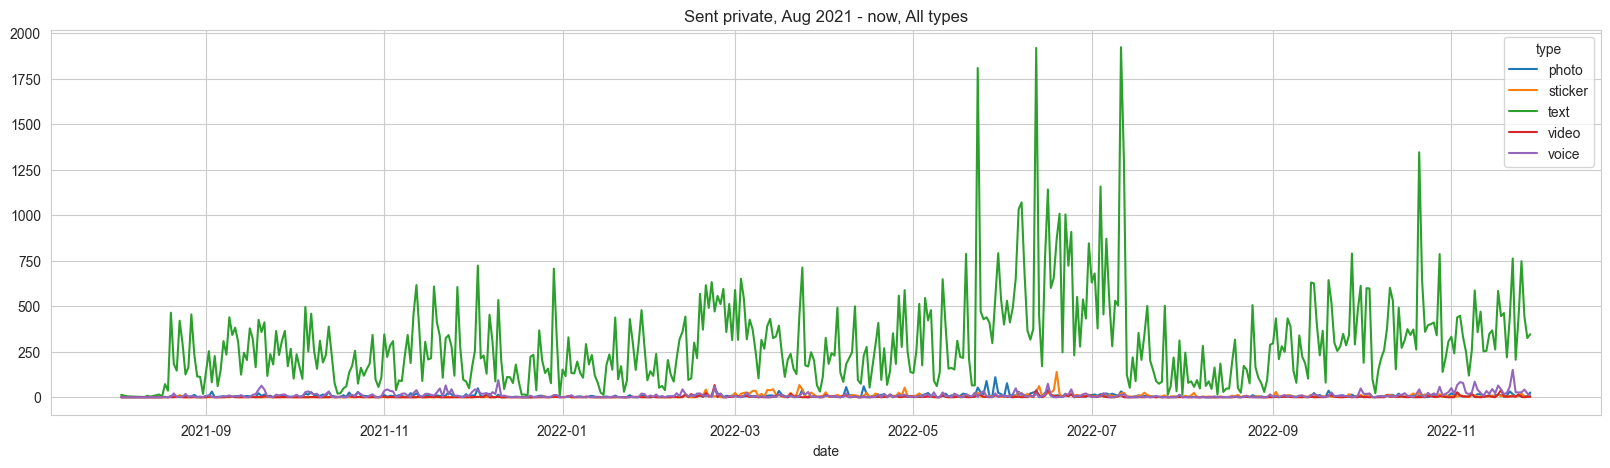

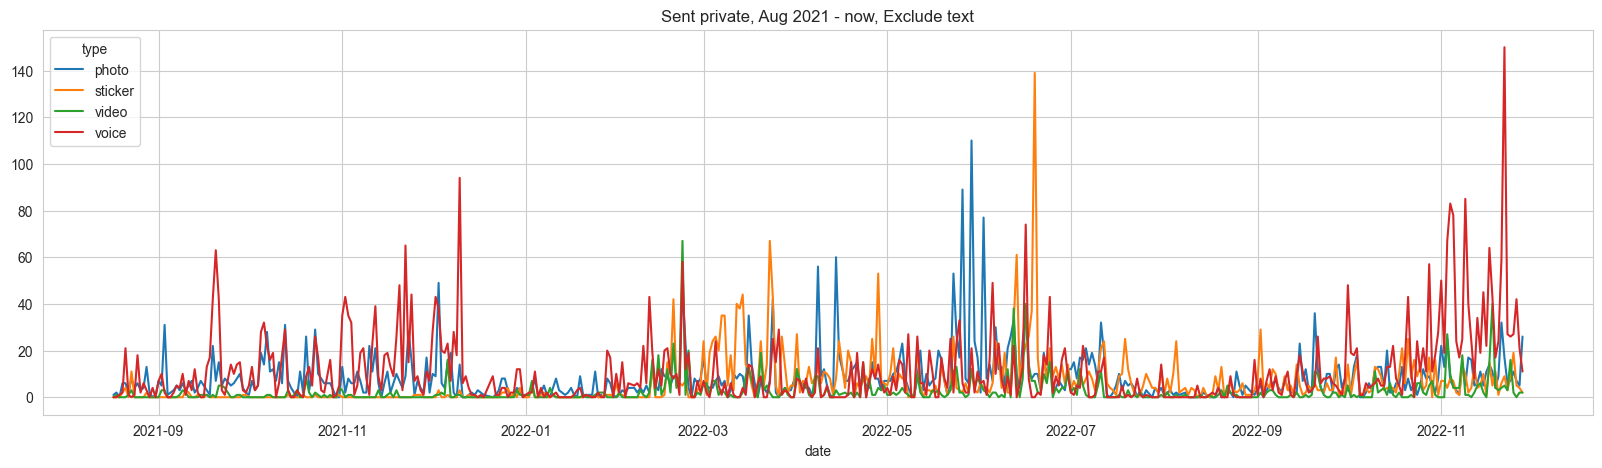

In [40]:
plot_distribution_of_message_types_by_day(get_sent_messages(private_messages),
                                          "Sent private, Aug 2021 - now, All types",
                                          date(2021, 8, 1), datetime.today().date())
plot_distribution_of_message_types_by_day(get_sent_messages(private_messages),
                                          "Sent private, Aug 2021 - now, Exclude text",
                                          date(2021, 8, 1), datetime.today().date(), True)

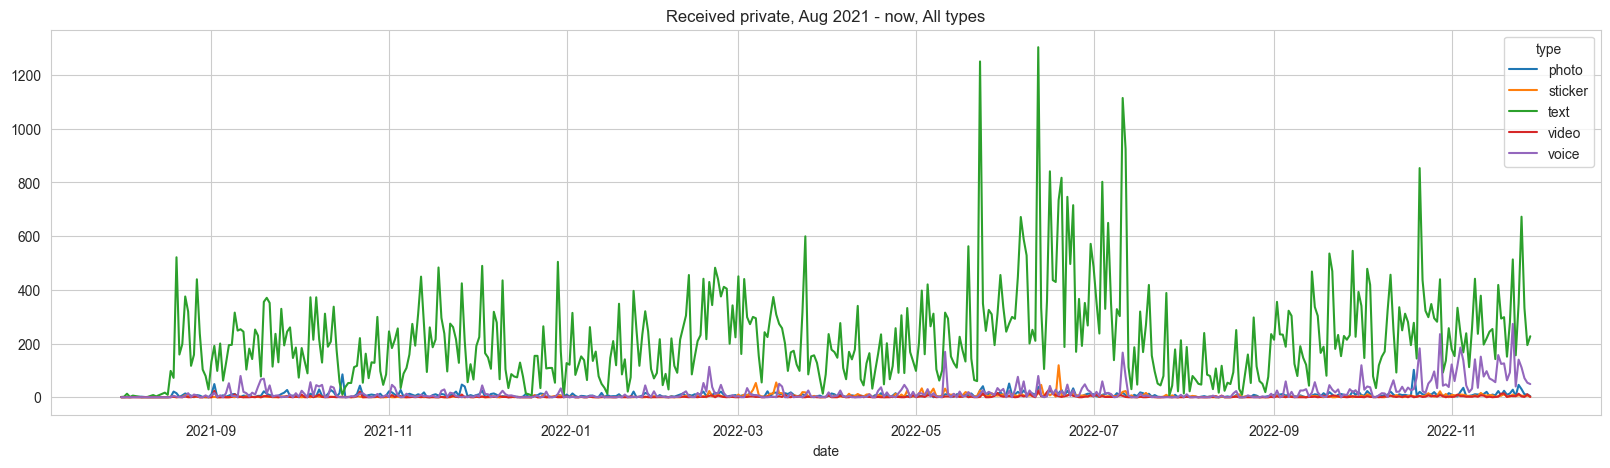

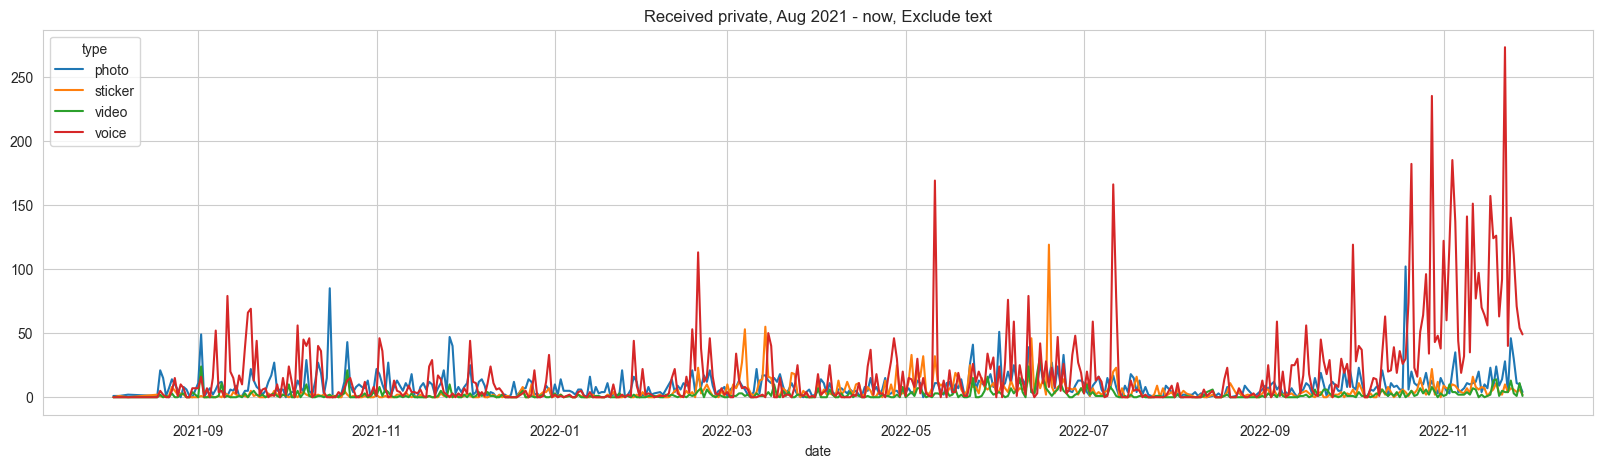

In [41]:
plot_distribution_of_message_types_by_day(get_received_messages(private_messages),
                                          "Received private, Aug 2021 - now, All types",
                                          date(2021, 8, 1), datetime.today().date())
plot_distribution_of_message_types_by_day(get_received_messages(private_messages),
                                          "Received private, Aug 2021 - now, Exclude text",
                                          date(2021, 8, 1), datetime.today().date(), True)

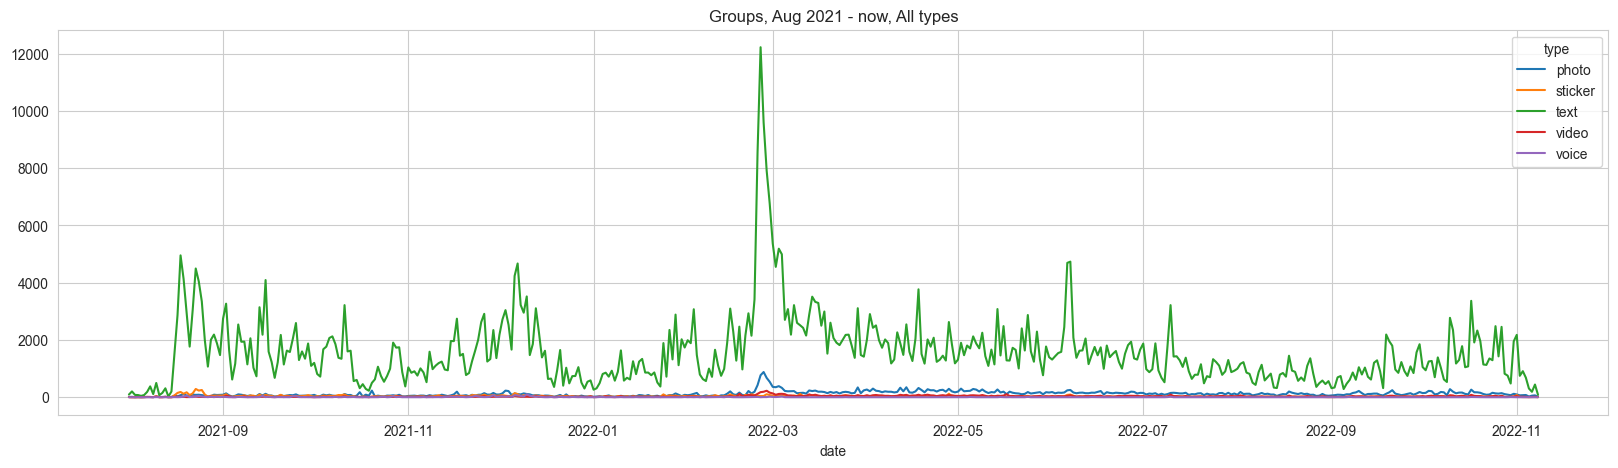

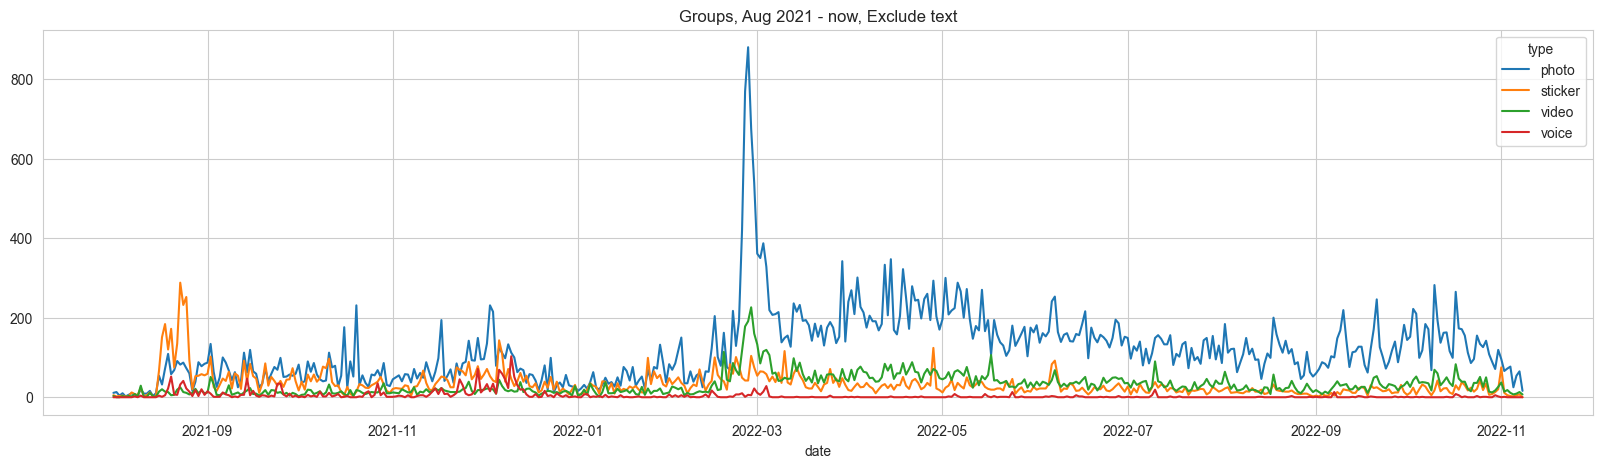

In [42]:
plot_distribution_of_message_types_by_day(group_messages, "Groups, Aug 2021 - now, All types",
                                          date(2021, 8, 1), datetime.today().date())
plot_distribution_of_message_types_by_day(group_messages, "Groups, Aug 2021 - now, Exclude text",
                                          date(2021, 8, 1), datetime.today().date(), True)

In [43]:
def plot_message_categories_chart(messages: pd.DataFrame, title: str):
    types = messages.groupby(['type']).size()
    types.plot(kind='pie', autopct='%1.1f%%', title=f'Distribution of {title} by message types')

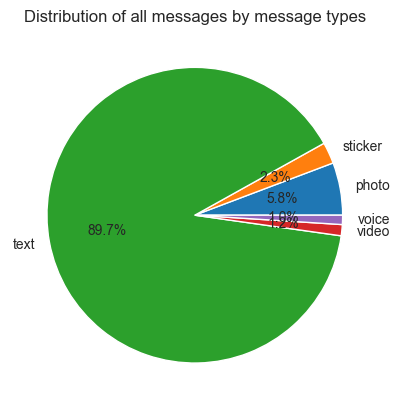

In [44]:
plot_message_categories_chart(df, "all messages")

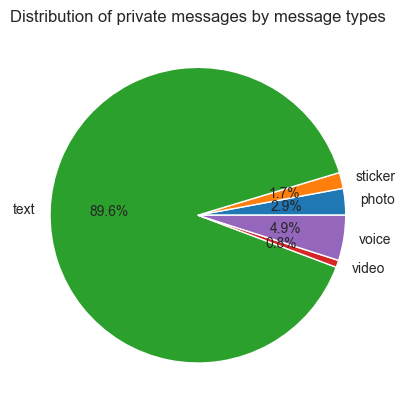

In [45]:
plot_message_categories_chart(private_messages, "private messages")

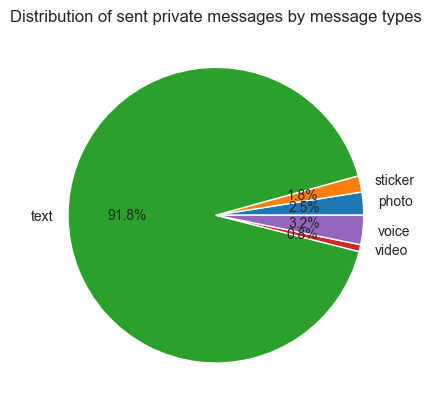

In [46]:
plot_message_categories_chart(get_sent_messages(private_messages), "sent private messages")

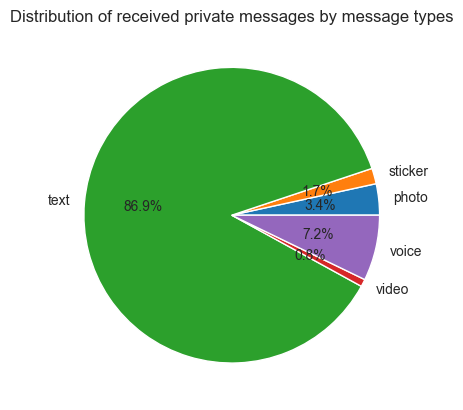

In [47]:
plot_message_categories_chart(get_received_messages(private_messages), "received private messages")

Calculate top-10 people to whom you wrote the biggest amount of messages (name, amount of messages).

In [48]:
def get_name_by_id(id: int) -> str:
    names = df_meta[df_meta['dialog_id'] == id]['name'].values
    return names[0] if len(names) != 0 else f"unknown user with id={{{id}}}"


# generic function for tasks 7 and 8
def get_dialogs_with_most_messages(messages: pd.DataFrame, limit: int = 10) -> pd.DataFrame:
    top_people = messages.groupby(['dialog_id']).size().sort_values(ascending=False).head(limit)
    data = [[get_name_by_id(id), amount] for id, amount in top_people.items()]

    return pd.DataFrame(data, columns=['name', 'amount'])

In [49]:
get_dialogs_with_most_messages(get_sent_messages(private_messages))

,name,amount
0,🌸 Аня Цвєткова,39525
1,Дора 🙈 Мандрівниця 🎒,27633
2,☀️ Соня Буділова,17176
3,Вітьок Словак,16974
4,Вова 🗿,13806
5,Настя Шашкевич,10011
6,Іра Кметь,6353
7,Катя Мудра,4770
8,Женьок,4381
9,Любов Полякова,1621


Calculate top-10 people who wrote the biggest amount of messages to you (name, amount of messages).

In [50]:
get_dialogs_with_most_messages(get_received_messages(private_messages))

,name,amount
0,🌸 Аня Цвєткова,27433
1,Дора 🙈 Мандрівниця 🎒,23394
2,Вітьок Словак,15928
3,☀️ Соня Буділова,12327
4,Вова 🗿,8565
5,Настя Шашкевич,6220
6,Іра Кметь,4818
7,Женьок,4792
8,Катя Мудра,4194
9,Andrii,1377


Draw a chart of reactions distribution

In [51]:
from ast import literal_eval

In [52]:
contains_my_reaction = lambda reaction: reaction != "{}" and str(reaction) != 'nan' and MY_ID in literal_eval(reaction)
messages_with_my_reactions = df[df['reactions'].apply(contains_my_reaction)]['reactions']
my_reactions = [literal_eval(reactions)[MY_ID] for reactions in messages_with_my_reactions]

In [53]:
emoji_count = pd.Series(my_reactions).value_counts()
emoji_count

👍      7751
❤      3885
🤔      2427
😢      1955
😁      1183
🔥      1180
💩       509
🤯       386
🥰       238
🤩       226
👎       102
👏        29
❤‍🔥      26
🌚        20
🤮        18
😱        17
🤬        15
🥴        15
💔        13
🌭        11
🍾        11
💯        11
🍓        10
🙏        10
🤡        10
🤨         8
🎉         8
🐳         7
😍         6
⚡         5
🕊         4
🏆         3
👌         3
😈         3
😭         2
👻         2
👨‍💻       1
😴         1
😐         1
👀         1
🍌         1
🖕         1
dtype: int64

<AxesSubplot: >

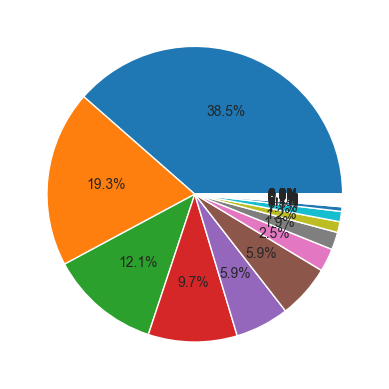

In [54]:
emoji_count.plot(kind='pie', labels=None, autopct='%1.1f%%')

## Metadata analysis

In [55]:
df_meta.shape

(8604, 4)

In [56]:
df_meta.head(10)

,dialog_id,name,type,users
0,-1001124109395,Філіал КМЦ,Group,"{'user_id': 350500073, 'first_name': 'Пєтя кн-..."
1,-1001124109395,Філіал КМЦ,Group,"{'user_id': 346039675, 'first_name': 'Sofia', ..."
2,-1001124109395,Філіал КМЦ,Group,"{'user_id': 362602841, 'first_name': 'Даша', '..."
3,-1001124109395,Філіал КМЦ,Group,"{'user_id': 381081723, 'first_name': 'Антон', ..."
4,-1001124109395,Філіал КМЦ,Group,"{'user_id': 691654799, 'first_name': 'Іруся!',..."
5,-1001124109395,Філіал КМЦ,Group,"{'user_id': 468240548, 'first_name': 'даня бад..."
6,-1001124109395,Філіал КМЦ,Group,"{'user_id': 807629013, 'first_name': 'Флекс', ..."
7,-1001124109395,Філіал КМЦ,Group,"{'user_id': 668673226, 'first_name': 'Andrii к..."
8,-1001124109395,Філіал КМЦ,Group,"{'user_id': 388554747, 'first_name': 'Євочка',..."
9,-1001124109395,Філіал КМЦ,Group,"{'user_id': 571028301, 'first_name': 'ен', 'la..."


In [57]:
df_meta.groupby(["type"])["type"].count()

type
Group             8448
Private dialog     156
Name: type, dtype: int64

Draw distribution of group sizes.

In [58]:
all_groups = df_meta[df_meta['type'] == "Group"]
group_sizes = all_groups.groupby(['name']).size()

In [59]:
group_sizes_dict = {}
for group_size in group_sizes.sort_values():
    group_sizes_dict[group_size] = 1 if not group_size in group_sizes_dict else group_sizes_dict[group_size] + 1

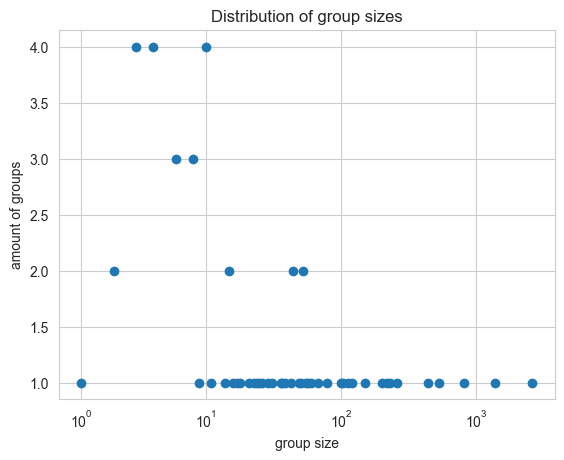

In [60]:
import matplotlib.pylab as plt

lists = group_sizes_dict.items()
x, y = zip(*lists)

plt.title("Distribution of group sizes")
plt.xlabel("group size")
plt.ylabel("amount of groups")

plt.xscale('asinh')

plt.scatter(x, y)
plt.show()

Calculate top-10 the biggest groups/channels.

In [61]:
group_sizes.sort_values(ascending=False).head(10)

name
Філіал КМЦ                          2593
Могилянський Кібер-плац             1387
ФІ                                   817
The School & Co                      536
KMA Random Coffee Chat               439
EPAM Java Summer 2022                260
Chat Course Distributed Lab 2021     232
Фреш-матгурток 🔱                     219
Маккейнстейт 3.0                     200
Школа ОСС                            152
dtype: int64

Calculate the number of distinct user names you are connected to through any type of dialogue.

In [62]:
distinct_users = {literal_eval(user)['user_id'] for user in df_meta['users']}
distinct_users.remove(MY_ID)

len(distinct_users)

4876